In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = "C:/Users/문도/Desktop/인지개 자료/car_evaluation.csv"
df = pd.read_csv(file_path)

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

Text(0.5, 1.0, 'Label')

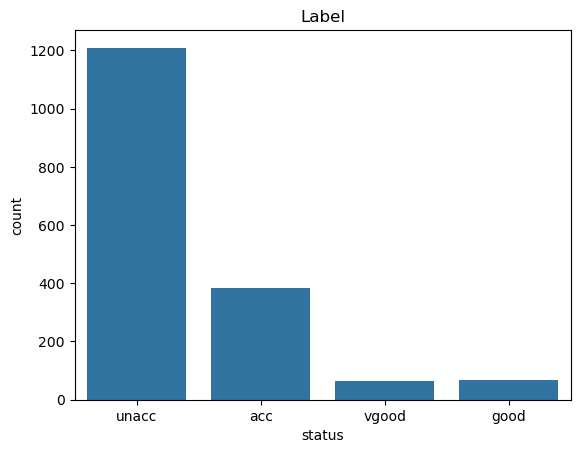

In [9]:
sns.countplot(data = df, x="unacc")
plt.xlabel("status")
plt.ylabel("count")
plt.title("Label")

In [17]:
label_encoder = LabelEncoder()

label_encoders = {}  # 칼럼별 인코더 저장

for col in df.select_dtypes(include=['object']).columns:  # 문자열(범주형) 칼럼만 선택
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # 문자열 → 숫자 변환
    label_encoders[col] = le  # 이후 디코딩을 위해 저장

df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [18]:
X = df.drop('unacc', axis = 1)
y = df['unacc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {
    'Random Forest' : RandomForestClassifier(random_state = 42),
    'Decision Tree' : DecisionTreeClassifier(random_state = 42),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state = 42),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(random_state = 42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {'Accuracy' : acc, 'Confusion Matrix' : cm}

for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("-" * 40)

Model: Random Forest
Accuracy: 0.9624
Confusion Matrix:
[[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]
----------------------------------------
Model: Decision Tree
Accuracy: 0.9711
Confusion Matrix:
[[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]
----------------------------------------
Model: Logistic Regression
Accuracy: 0.6850
Confusion Matrix:
[[ 12   0  64   1]
 [  2   0  13   0]
 [ 13   0 224   0]
 [ 11   0   5   1]]
----------------------------------------
Model: KNN
Accuracy: 0.8757
Confusion Matrix:
[[ 54   1  22   0]
 [ 12   2   1   0]
 [  0   0 237   0]
 [  6   0   1  10]]
----------------------------------------
Model: SVM
Accuracy: 0.8988
Confusion Matrix:
[[ 61   0  16   0]
 [ 11   2   0   2]
 [  1   0 236   0]
 [  5   0   0  12]]
----------------------------------------
